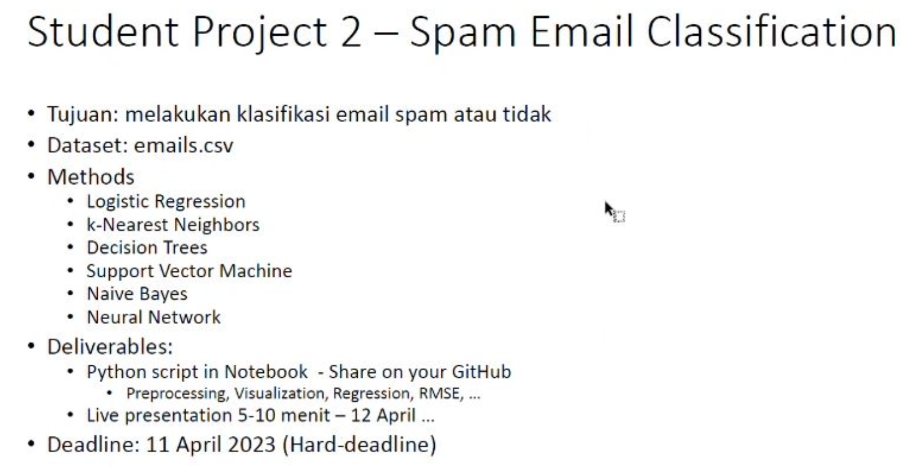

Student Project 2 - Spam Email Classification

 Methods :
* Logistic Regression
* KNN
* Decision Trees
* SVM
* Naive Bayes
* NN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# Mount Dataset from google drive apabila menggungakan googlecolab
# from google.colab import drive 
# drive.mount('/content/drive')

In [3]:
# Load dataset
df = pd.read_csv('DA/datasets/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### Preprocessing

In [4]:
df.shape

(5172, 3002)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
# df.corr()

In [10]:
# # Create correlation matrix
# corr_mat = df.corr(method='pearson')
  
# # Convert correlation matrix to 1-D Series and sort
# sorted_mat = corr_mat.unstack().sort_values(ascending = False)
  
# print(sorted_mat)

In [11]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [12]:
# INDEPENDENT VARIABLE
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# DEPENDENT VARIABLE
Y = df.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### Logistic Regression

In [14]:
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [15]:
# Train model
logistic.fit(X, Y)

print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")

# test
Y_pred = logistic.predict(X)

c:\Users\AGIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model weights: [[-88.96287578 -80.93785778 -86.06134271 ...  -2.0204061  -40.23858613
   -2.45335027]], bias: [376.09781269]


In [16]:
# Print report dengan classification metrics
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3672
           1       0.87      0.97      0.92      1500

    accuracy                           0.95      5172
   macro avg       0.93      0.96      0.94      5172
weighted avg       0.96      0.95      0.95      5172



In [17]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix

array([[3458,  214],
       [  39, 1461]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

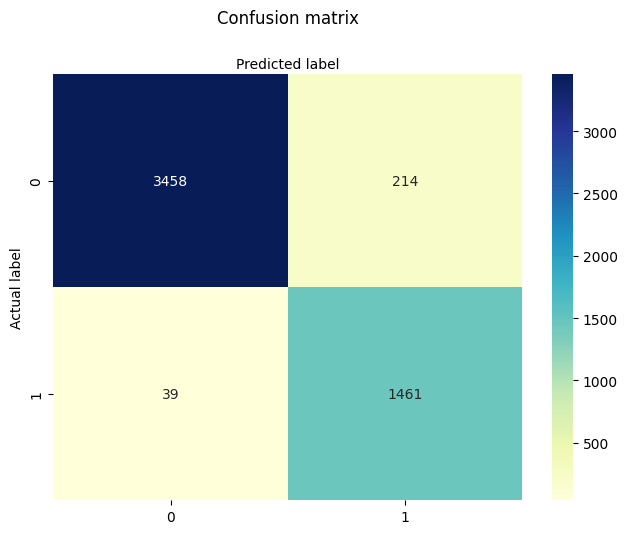

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(Y, Y_pred))
print("Precision:", metrics.precision_score(Y, Y_pred))
print("Recall:", metrics.recall_score(Y, Y_pred))
print("F1-Score:", metrics.f1_score(Y, Y_pred))

Accuracy: 0.9510827532869296
Precision: 0.8722388059701492
Recall: 0.974
F1-Score: 0.9203149606299212


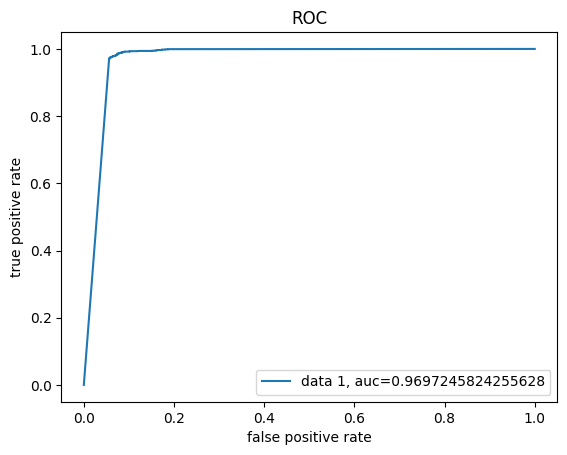

In [20]:
# ROC Curve

y_pred_proba = logistic.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y,  y_pred_proba)
auc = metrics.roc_auc_score(Y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

### KNN

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# buat classifier untuk Nearest Neighbors
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_knn = clf.predict(testX)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


[[793 105]
 [ 84 311]]


Text(0.5, 427.9555555555555, 'Predicted label')

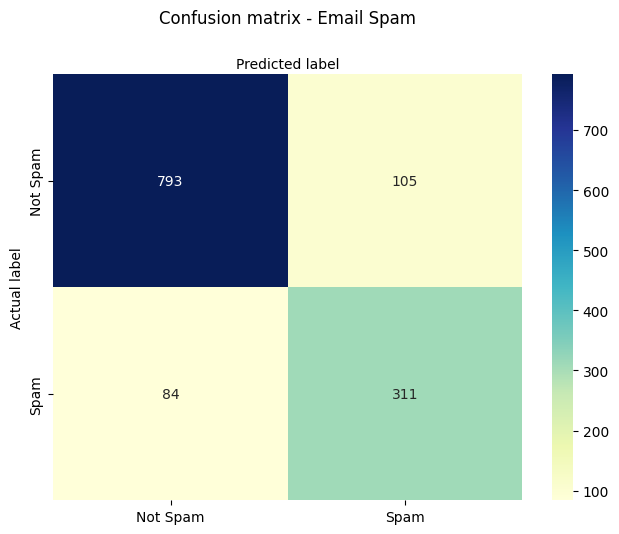

In [24]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_knn))
print("Precision:", metrics.precision_score(testY, y_pred_knn))
print("Recall:", metrics.recall_score(testY, y_pred_knn))
print("F1-Score:", metrics.f1_score(testY, y_pred_knn))

Accuracy: 0.8538283062645011
Precision: 0.7475961538461539
Recall: 0.7873417721518987
F1-Score: 0.7669543773119605


In [26]:
# from sklearn.model_selection import cross_val_score
# k_values = [i for i in range (1,31)]
# k_scores = []

# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
#     k_scores.append(np.mean(score))

# # plot to see clearly
# plt.plot(k_values, k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()

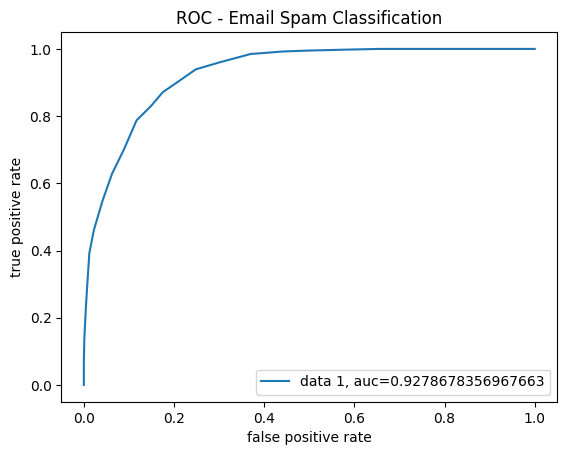

In [27]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_proba)
auc = metrics.roc_auc_score(testY, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

### Decission Tree

In [54]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

In [55]:
from sklearn.tree import DecisionTreeClassifier

# buat classifier untuk DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
print(clf_tree.get_params())

# Train model
clf_tree.fit(trainX, trainY)

# test
y_pred_tree = clf.predict(testX)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[914   4]
 [  2 373]]


Text(0.5, 427.9555555555555, 'Predicted label')

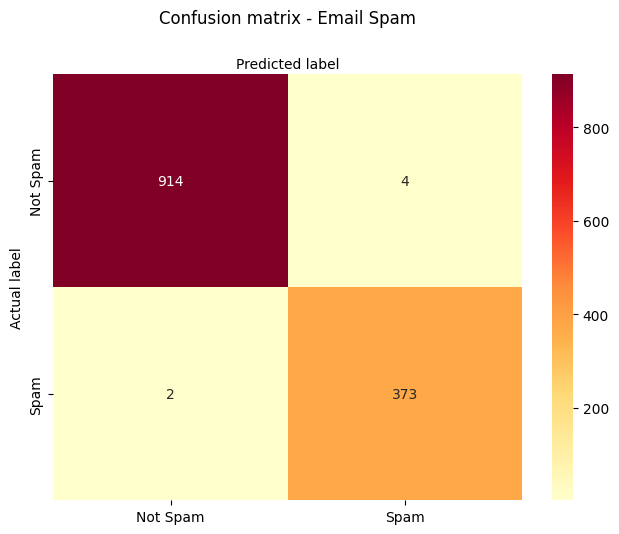

In [56]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_tree)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_tree))
print("Precision:", metrics.precision_score(testY, y_pred_tree))
print("Recall:", metrics.recall_score(testY, y_pred_tree))
print("F1-Score:", metrics.f1_score(testY, y_pred_tree))

Accuracy: 0.9953596287703016
Precision: 0.9893899204244032
Recall: 0.9946666666666667
F1-Score: 0.9920212765957447


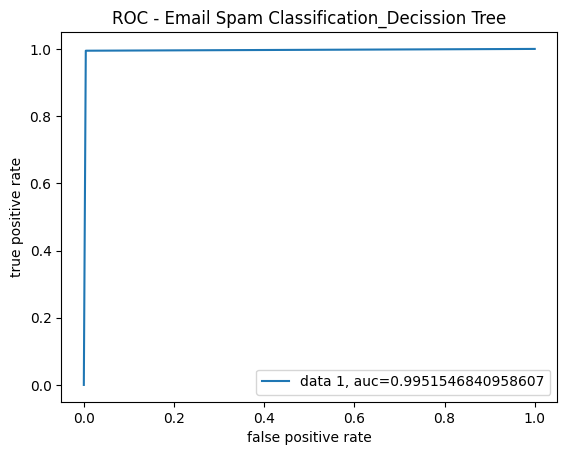

In [58]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_tree)
auc = metrics.roc_auc_score(testY, y_pred_tree)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Decission Tree')
plt.legend(loc=4)
plt.show()

### SVM

In [32]:
from sklearn.svm import SVC

In [60]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

In [61]:
# buat classifier untuk SVC
clf = SVC(probability=True)
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_svm = clf.predict(testX)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


[[893  26]
 [232 142]]


Text(0.5, 427.9555555555555, 'Predicted label')

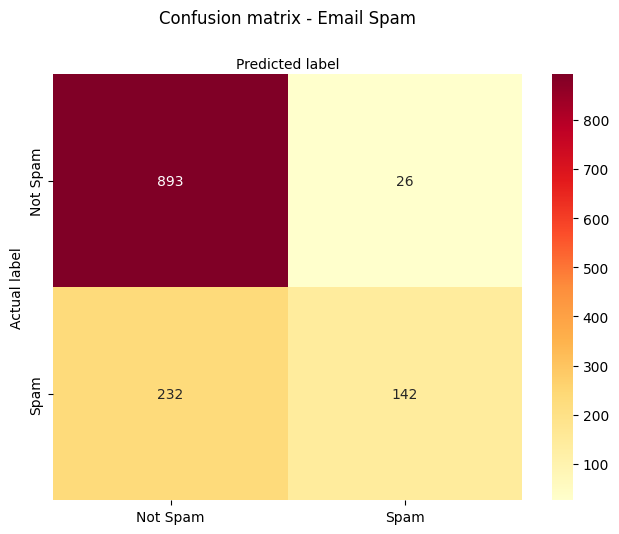

In [62]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testY, y_pred_svm)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_tree))
print("Precision:", metrics.precision_score(testY, y_pred_tree))
print("Recall:", metrics.recall_score(testY, y_pred_tree))
print("F1-Score:", metrics.f1_score(testY, y_pred_tree))

Accuracy: 0.5893271461716937
Precision: 0.2917771883289125
Recall: 0.29411764705882354
F1-Score: 0.29294274300932094


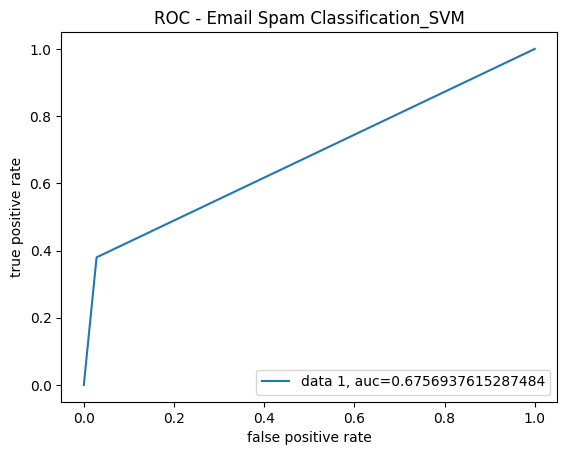

In [65]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_svm)
auc = metrics.roc_auc_score(testY, y_pred_svm)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_SVM')
plt.legend(loc=4)
plt.show()

### Naive Bayes

In [37]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)


In [39]:
from sklearn.naive_bayes import GaussianNB

# buat classifier untuk naive bayes
clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_gaus = clf.predict(testX)

{'priors': None, 'var_smoothing': 1e-09}


[[870  47]
 [ 12 364]]


Text(0.5, 427.9555555555555, 'Predicted label')

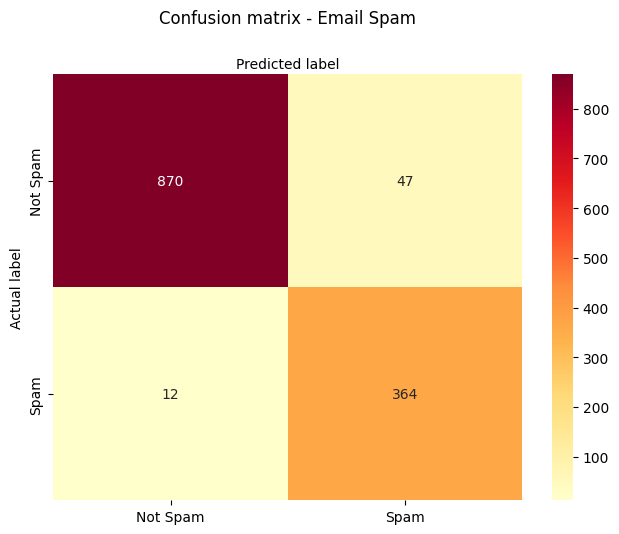

In [40]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testY, y_pred_gaus)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_gaus))
print("Precision:", metrics.precision_score(testY, y_pred_gaus))
print("Recall:", metrics.recall_score(testY, y_pred_gaus))
print("F1-Score:", metrics.f1_score(testY, y_pred_gaus))

Accuracy: 0.954369682907966
Precision: 0.8856447688564477
Recall: 0.9680851063829787
F1-Score: 0.9250317662007624


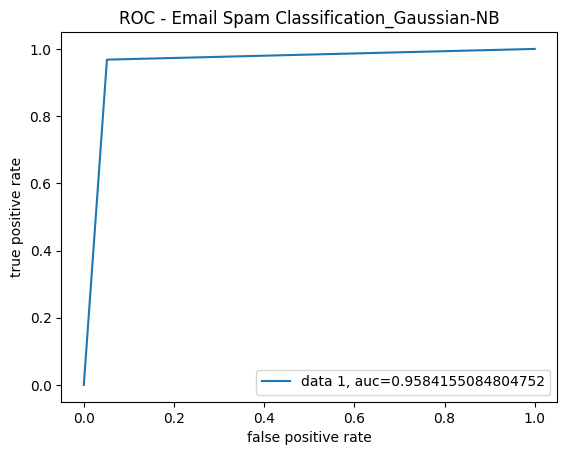

In [42]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_gaus)
auc = metrics.roc_auc_score(testY, y_pred_gaus)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Gaussian-NB')
plt.legend(loc=4)
plt.show()

### Neural Networks

In [44]:
# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

In [45]:
from sklearn.neural_network import MLPClassifier

In [47]:
# buat classifier untuk MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(trainX, trainY)

# test
y_pred_nn = clf.predict(testX)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[888  15]
 [  7 383]]


Text(0.5, 427.9555555555555, 'Predicted label')

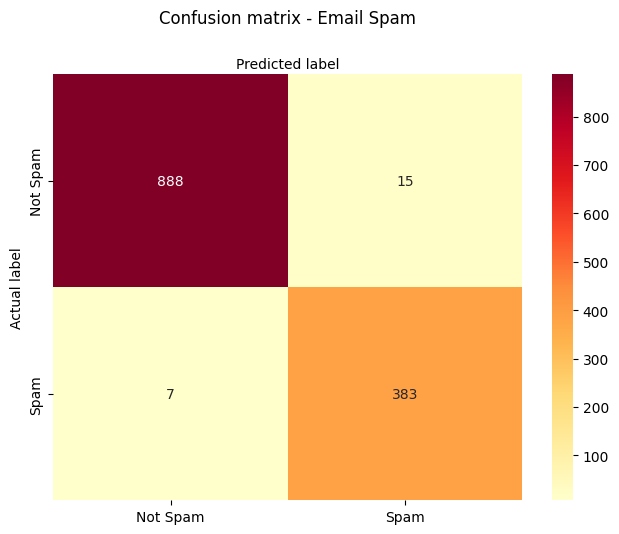

In [48]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testY, y_pred_nn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testY, y_pred_nn))
print("Precision:", metrics.precision_score(testY, y_pred_nn))
print("Recall:", metrics.recall_score(testY, y_pred_nn))
print("F1-Score:", metrics.f1_score(testY, y_pred_nn))

Accuracy: 0.982985305491106
Precision: 0.9623115577889447
Recall: 0.982051282051282
F1-Score: 0.9720812182741118


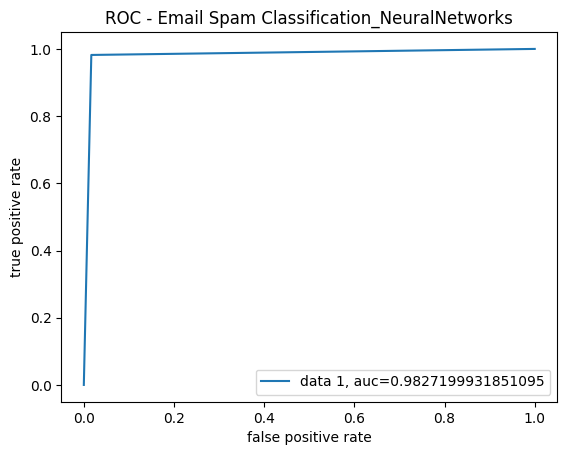

In [51]:
# ROC
y_pred_proba = clf.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  y_pred_nn)
auc = metrics.roc_auc_score(testY, y_pred_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()